In [1]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

import floatpy.readers.padeops_reader as por

%matplotlib inline
%config InlineBackend.figure_format = 'png'

directory = '../outputs'
filename_prefix = directory + '/shearlayer_'
savefig = False
output_prefix = '../visualization/shearlayer_'

reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))

In [2]:
reader.domain_size

(256, 128, 128)

In [3]:
reader.sub_domain = ((0,reader.domain_size[1]/2,0), (reader.domain_size[0]-1,reader.domain_size[1]/2,reader.domain_size[2]-1))
reader.sub_domain

((0, 64, 0), (255, 64, 127))

In [4]:
x, y, z = reader.readCoordinates()

In [5]:
steps = sorted(reader.steps)

In [6]:
def visualize(reader, step, prefix='../visualization/shearlayer_', savefig=False):
    reader.step = step

    varnames  = ('rho', 'p', 'T', 'u', 'v', 'w')
    variables = reader.readData(varnames)

    xmin, xmax = x[0,0,0], x[-1,-1,-1]
    zmin, zmax = z[0,0,0], z[-1,-1,-1]
    
    extent = (x[0,0,0], x[-1,-1,-1], z[0,0,0], z[-1,-1,-1])
    
    fig, ax = plt.subplots(6,1,figsize=(90, 30))
    for i, var in enumerate(variables):
        im = ax[i].imshow(var[:, 0, :].T, origin='lower', extent=extent, 
                          interpolation='none', cmap=plt.get_cmap('inferno'))
        ax[i].set_xlabel(r'$x$', fontsize=20)
        ax[i].set_ylabel(r'$z$', fontsize=20)
        ax[i].set_title(varnames[i], fontsize=20)
        
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes('right', size='2%', pad=0.1)
        cbar = plt.colorbar(im, cax=cax)

    plt.tick_params(labelsize=12)

    plt.tight_layout()
    if savefig:
        plt.savefig(prefix + '%04d.png' %reader.step, dpi=200)
        plt.close(fig)
        print "Saved plot to " + prefix + '%04d.png' %reader.step
    else:
        plt.show()

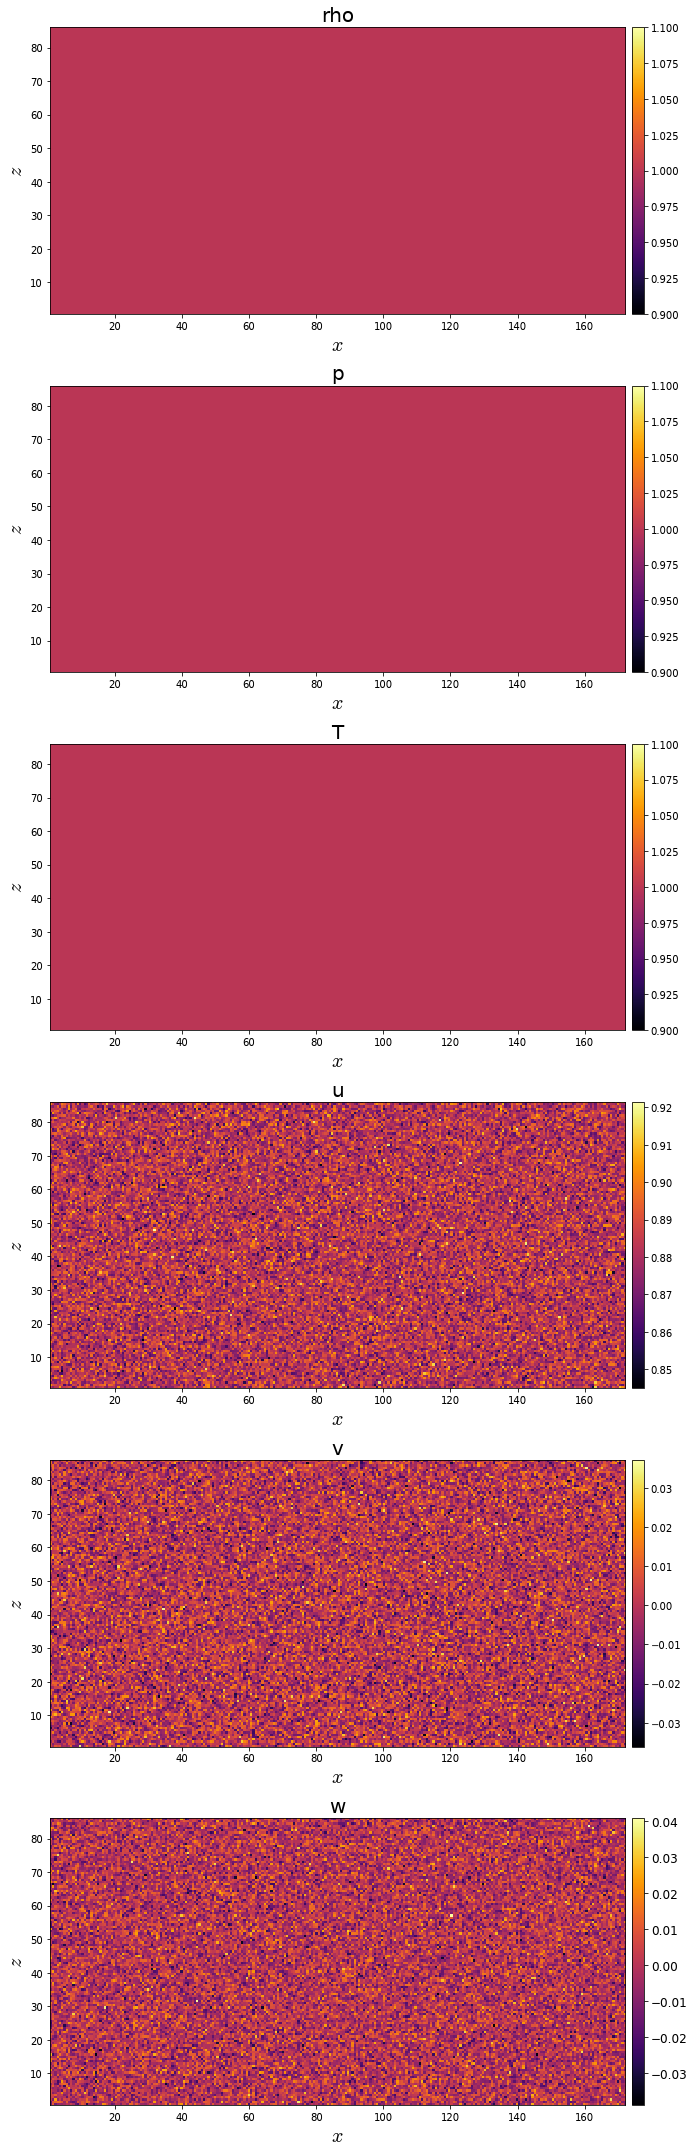

In [7]:
visualize(reader, 0, prefix=output_prefix, savefig=False)

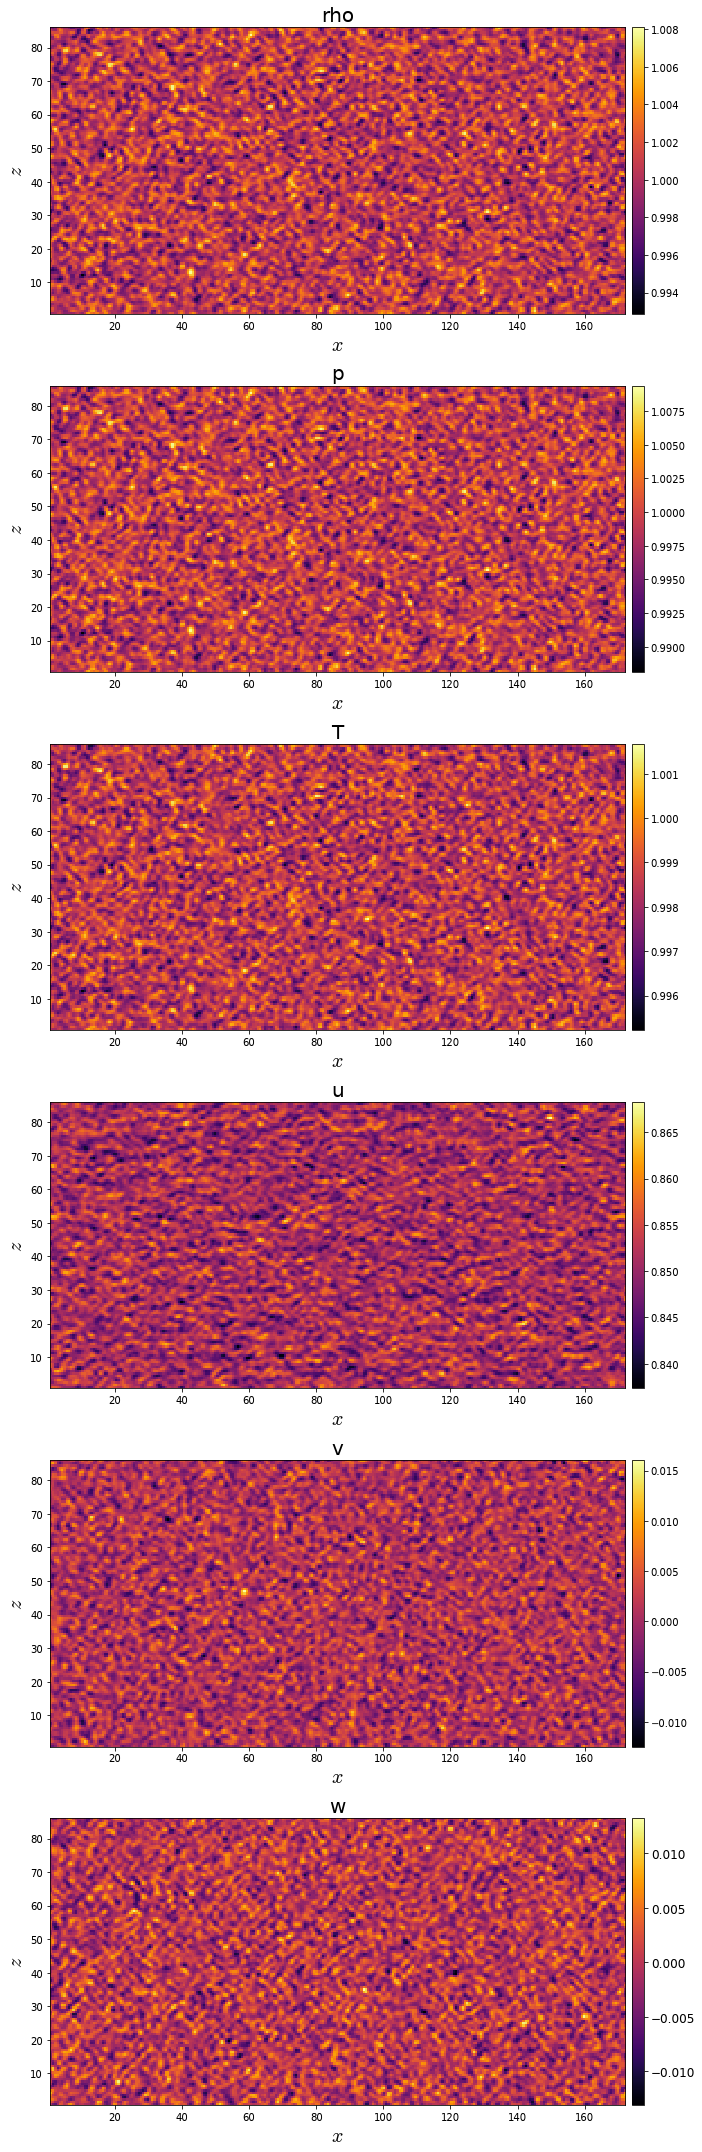

In [8]:
visualize(reader, 50, prefix=output_prefix, savefig=False)